In [3]:
import pandas as pd
import numpy as np
import glob
import pickle
import seaborn as sns; sns.set()
from datetime import datetime
from matplotlib import pyplot as plt
import time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, ShuffleSplit

In [2]:
# ! pip install imblearn

In [93]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


# This section reads all data files and writes into a single dataframe, then deletes unwated column and writes cleaned dataframe into a csv

In [3]:
# all_year_h1_df = pd.DataFrame()
# for f in glob.glob("..\FinalProject_ML\data\H*.xlsx"):
#     df = pd.read_excel(f)
#     all_year_h1_df = all_year_h1_df.append(df,ignore_index=True)

In [4]:
# #list of columns to be deleted
# dr_col=["AGENT_ATTORNEY_CITY","AGENT_ATTORNEY_NAME", "AGENT_ATTORNEY_STATE",
#        "AGENT_REPRESENTING_EMPLOYER","CASE_NUMBER","EMPLOYER_PROVINCE", "EMPLOYER_PHONE_EXT",
#         "AGENT_REPRESENTING_EMPLOYER","AGENT_ATTORNEY_NAME","AGENT_ATTORNEY_CITY",
#         "AGENT_ATTORNEY_STATE","SOC_CODE","NAICS_CODE","LABOR_CON_AGREE",
#         "PUBLIC_DISCLOSURE_LOCATION","ORIGINAL_CERT_DATE","EMPLOYER_ADDRESS1", "EMPLOYER_ADDRESS2","EMPLOYER_BUSINESS_DBA",
#         "EMPLOYER_PHONE","EMPLOYER_PHONE_EXT","EMPLOYER_POSTAL_CODE", "EMPLOYER_PROVINCE", "EMPLOYER_STATE",
#         "LCA_CASE_WORKLOC1_CITY","LCA_CASE_WORKLOC1_STATE", "LCA_CASE_WORKLOC2_CITY","CHANGE_EMPLOYER",
#        "CHANGE_PREVIOUS_EMPLOYMENT", "CONTINUED_EMPLOYMENT", "DECISION_DATE",
#        "EMPLOYER_ADDRESS", "EMPLOYER_CITY", "EMPLOYER_COUNTRY","FULL_TIME_POS",'LCA_CASE_EMPLOYER_ADDRESS',
#        'LCA_CASE_EMPLOYER_CITY', 'LCA_CASE_EMPLOYER_POSTAL_CODE', 'LCA_CASE_EMPLOYER_STATE',       
#        'LCA_CASE_JOB_TITLE', 'LCA_CASE_NAICS_CODE', 'LCA_CASE_NUMBER',
#        'LCA_CASE_SOC_CODE', 'LCA_CASE_SOC_NAME', 'LCA_CASE_SUBMIT',
#        'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO',
#        'LCA_CASE_WAGE_RATE_UNIT', 'LCA_CASE_WORKLOC2_STATE', 'NAIC_CODE',
#         'NEW_CONCURRENT_EMP', 'NEW_CONCURRENT_EMPLOYMENT', 'NEW_EMPLOYMENT',
#        'OTHER_WAGE_SOURCE_1', 'OTHER_WAGE_SOURCE_2','PW_1',
#        'PW_2', 'PW_SOURCE', 'PW_SOURCE_1', 'PW_SOURCE_2', 'PW_SOURCE_OTHER',
#        'PW_SOURCE_YEAR', 'PW_UNIT_1', 'PW_UNIT_2','PW_WAGE_LEVEL', 'PW_WAGE_SOURCE', 'PW_WAGE_SOURCE_OTHER',
#        'PW_WAGE_SOURCE_YEAR', 'SOC_NAME', 'STATUS', 'SUPPORT_H1B',
#        'TOTAL WORKERS', 'TOTAL_WORKERS', 'WAGE_RATE_OF_PAY',
#        'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY','WORKSITE_COUNTY', 'WORKSITE_POSTAL_CODE', 'WORKSITE_STATE',
#        'YR_SOURCE_PUB_1', 'YR_SOURCE_PUB_2','H-1B_DEPENDENT','AMENDED_PETITION','CASE_SUBMITTED','WORKSITE_CITY']


# #delete/drop columns from above list
# all_year_h1_df = all_year_h1_df.drop(dr_col,axis=1)
# all_year_h1_df.drop( all_year_h1_df[ all_year_h1_df['EMPLOYMENT_START_DATE'] == '09/31/2015' ].index , inplace=True)

In [5]:
# all_year_h1_df.to_csv("alldata.csv")

# Loading csv saved above

In [5]:
all_year_h1_df = pd.read_csv("alldata.csv")

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,5,6,7,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# all_year_h1_df.dropna(how='all')
# all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYER_NAME"])
# all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYMENT_START_DATE"])
# all_year_h1_df = all_year_h1_df.dropna(subset=["EMPLOYMENT_END_DATE"])

In [6]:
all_year_h1_df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,PREVAILING_WAGE,PW_UNIT_OF_PAY,VISA_CLASS,WILLFUL_VIOLATOR
0,0,WITHDRAWN,"MEDTRONIC, INC.",02/28/2015,02/09/2015,Y,NaN,MECHANICAL ENGINEER,19000.00,Year,H-1B,N
1,1,CERTIFIED,UNIVERSITY OF OKLAHOMA,01/04/2018,01/05/2015,Y,NaN,ASSISTANT PROFESSOR,42860.00,Year,H-1B,N
2,2,WITHDRAWN,NOKIA INC.,01/06/2016,01/07/2013,Y,NaN,RELEASE AND SOFTWARE TEST MANAGER,73965.00,Year,H-1B,N
3,3,CERTIFIED,"OMRON OILFIELD AND MARINE, INC.",09/07/2018,09/07/2015,Y,NaN,CONTROL ENGINEERING SPECIALIST,65998.00,Year,H-1B,N
4,4,CERTIFIED,FEDERAL HOME LOAN MORTGAGE CO.,06/05/2018,06/06/2015,Y,NaN,DEVELOPMENT SENIOR,96907.00,Year,H-1B,N
5,5,WITHDRAWN,"APLARS, LLC",01/25/2016,01/25/2015,Y,NaN,BUSINESS ANALYST,20000.00,Year,H-1B,N
6,6,CERTIFIED,"VMWARE, INC.",11/02/2017,11/03/2014,Y,NaN,STAFF ENGINEER,133976.00,Year,H-1B,N
7,7,CERTIFIED,FEDERAL HOME LOAN MORTGAGE CORPORATION,06/13/2018,06/14/2015,Y,NaN,CREDIT GUARANTEE ANALYTICS SENIOR,64085.00,Year,H-1B,N
8,8,CERTIFIED,"VMWARE, INC.",11/16/2017,11/17/2014,Y,NaN,PROGRAMMER/ANALYST - SENIOR APPLICATIONS DEVEL...,101900.00,Year,H-1B,N
9,9,DENIED,IMAEX TRADING COMPANY,09/17/2018,09/17/2015,N,NaN,COST ACCOUNTANT,22.46,Hour,H-1B,N


In [7]:
 all_year_h1_df = all_year_h1_df.dropna(how='any')

In [68]:
all_year_h1_df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,PREVAILING_WAGE,PW_UNIT_OF_PAY,VISA_CLASS,WILLFUL_VIOLATOR
1266656,1266656,CERTIFIED-WITHDRAWN,DISCOVER PRODUCTS INC.,2019-08-10 00:00:00,2016-08-10 00:00:00,Y,N,ASSOCIATE DATA INTEGRATION,59197.00,Year,H-1B,N
1266657,1266657,CERTIFIED-WITHDRAWN,DFS SERVICES LLC,2019-08-16 00:00:00,2016-08-16 00:00:00,Y,N,SENIOR ASSOCIATE,49800.00,Year,H-1B,N
1266658,1266658,CERTIFIED-WITHDRAWN,EASTBANC TECHNOLOGIES LLC,2019-09-09 00:00:00,2016-09-09 00:00:00,Y,Y,.NET SOFTWARE PROGRAMMER,76502.00,Year,H-1B,N
1266659,1266659,WITHDRAWN,INFO SERVICES LLC,2020-01-25 00:00:00,2017-01-26 00:00:00,Y,Y,PROJECT MANAGER,90376.00,Year,H-1B,N
1266660,1266660,CERTIFIED-WITHDRAWN,BB&T CORPORATION,2018-03-01 00:00:00,2015-03-01 00:00:00,Y,N,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,116605.00,Year,H-1B,N
1266661,1266661,CERTIFIED-WITHDRAWN,"SUNTRUST BANKS, INC.",2018-09-11 00:00:00,2015-09-11 00:00:00,Y,N,CREDIT RISK METRICS SPECIALIST,59405.00,Year,H-1B,N
1266662,1266662,CERTIFIED-WITHDRAWN,CITADEL INFORMATION SERVICES INC.,2019-08-24 00:00:00,2016-08-25 00:00:00,Y,Y,BUSINESS SYSTEMS ANALYST,52915.00,Year,H-1B,N
1266663,1266663,CERTIFIED-WITHDRAWN,CITADEL INFORMATION SERVICES INC.,2019-08-25 00:00:00,2016-08-26 00:00:00,Y,Y,PROGRAMMER ANALYST,51730.00,Year,H-1B,N
1266664,1266664,CERTIFIED-WITHDRAWN,CITADEL INFORMATION SERVICES INC.,2019-08-25 00:00:00,2016-08-26 00:00:00,Y,Y,PROGRAMMER ANALYST,58053.00,Year,H-1B,N
1266665,1266665,CERTIFIED-WITHDRAWN,CITADEL INFORMATION SERVICES INC.,2019-08-26 00:00:00,2016-08-29 00:00:00,Y,Y,MARKET RESEARCH ANALYST,46821.00,Year,H-1B,N


In [8]:
all_year_h1_df['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

In [9]:
all_year_h1_df = all_year_h1_df.drop(all_year_h1_df[all_year_h1_df.CASE_STATUS == 'WITHDRAWN'].index)
all_year_h1_df = all_year_h1_df.drop(all_year_h1_df[all_year_h1_df.CASE_STATUS == 'CERTIFIED-WITHDRAWN'].index)

In [10]:
all_year_h1_df.CASE_STATUS.value_counts() / len(all_year_h1_df)

CERTIFIED    0.986368
DENIED       0.013632
Name: CASE_STATUS, dtype: float64

In [11]:
all_year_h1_df['WILLFUL_VIOLATOR'].unique()

array(['N', 'Y'], dtype=object)

In [12]:
all_year_h1_df['FULL_TIME_POSITION'].unique()

array(['Y', 'N'], dtype=object)

In [13]:
# all_year_h1_df.loc[all_year_h1_df['CASE_STATUS'].str.contains("CERTIFIED") & all_year_h1_df["WILLFUL_VIOLATOR"].isna(), 'WILLFUL_VIOLATOR'] = "N"
# all_year_h1_df.loc[all_year_h1_df['CASE_STATUS'].str.contains("DENIED") & all_year_h1_df["WILLFUL_VIOLATOR"].isna(), 'WILLFUL_VIOLATOR'] = "Y"

# all_year_h1_df["FULL_TIME_POSITION"].fillna("N")
# all_year_h1_df.loc[all_year_h1_df['CASE_STATUS'].str.contains("CERTIFIED"), 'FULL_TIME_POSITION'] = "Y"


In [14]:
all_year_h1_df['CASE_STATUS'].value_counts()

CERTIFIED    1101473
DENIED         15223
Name: CASE_STATUS, dtype: int64

In [15]:
all_year_h1_df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'EMPLOYMENT_END_DATE',
       'EMPLOYMENT_START_DATE', 'FULL_TIME_POSITION', 'H1B_DEPENDENT',
       'JOB_TITLE', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'VISA_CLASS',
       'WILLFUL_VIOLATOR'],
      dtype='object')

In [16]:
all_year_h1_df.shape

(1116696, 12)

In [17]:
del all_year_h1_df['Unnamed: 0']

In [18]:
all_year_h1_df['H1B_DEPENDENT'].unique()

array(['Y', 'N'], dtype=object)

In [19]:
all_year_h1_df['CASE_STATUS'] = np.where(all_year_h1_df['CASE_STATUS'].str.contains("CERTIFIED"), 1,0) 
all_year_h1_df['FULL_TIME_POSITION'] = np.where(all_year_h1_df['FULL_TIME_POSITION']=="Y", 1,0) 
all_year_h1_df['WILLFUL_VIOLATOR'] = np.where(all_year_h1_df['WILLFUL_VIOLATOR']=="Y", 1,0) 
all_year_h1_df['H1B_DEPENDENT'] = np.where(all_year_h1_df['H1B_DEPENDENT'].str.contains("Y"), 1,0)


In [20]:
all_year_h1_df.VISA_CLASS.unique()

array(['H-1B', 'E-3 Australian', 'H-1B1 Chile', 'H-1B1 Singapore'],
      dtype=object)

In [21]:
del all_year_h1_df['VISA_CLASS']

In [22]:
all_year_h1_df.PW_UNIT_OF_PAY.unique()

array(['Year', 'Hour', 'Month', 'Week', 'Bi-Weekly'], dtype=object)

In [23]:
conditions = [
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Hour")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Month")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Week")) & (all_year_h1_df['PREVAILING_WAGE']>0 ),
        (all_year_h1_df['PW_UNIT_OF_PAY'].str.contains("Bi-Weekly")) & (all_year_h1_df['PREVAILING_WAGE']>0 )]
     
choices = [(all_year_h1_df['PREVAILING_WAGE'] * 2000), 
           (all_year_h1_df['PREVAILING_WAGE'] * 12), 
           (all_year_h1_df['PREVAILING_WAGE'] * 50),
            (all_year_h1_df['PREVAILING_WAGE'] * 25)]
all_year_h1_df['PWAGE'] = np.select(conditions, choices, default = all_year_h1_df['PREVAILING_WAGE'])

In [24]:
del all_year_h1_df['PREVAILING_WAGE']
del all_year_h1_df['PW_UNIT_OF_PAY']

In [25]:
print(len(all_year_h1_df.JOB_TITLE.unique()))

150877


In [26]:
all_year_h1_df.head(10)

,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE
1266850,1,CLOUDWICK TECHNOLOGIES INC.,2019-09-20 00:00:00,2016-10-01 00:00:00,1,1,HADOOP ADMINISTRATOR,0,102149.0
1266851,1,TATA CONSULTANCY SERVICES LIMITED,2019-09-21 00:00:00,2016-09-27 00:00:00,1,1,DEVELOPER USER INTERFACE,0,56784.0
1266852,1,"HEALTH MANAGEMENT SYSTEMS, INC.",2020-03-26 00:00:00,2017-03-27 00:00:00,1,0,SOLUTION ARCHITECT,0,85197.0
1266853,1,"BLACKROCK INVESTMENT MANAGEMENT, LLC",2020-03-12 00:00:00,2017-03-15 00:00:00,1,0,VICE PRESIDENT,0,117770.0
1266854,1,"UNIVERSITY OF CALIFORNIA, BERKELEY",2017-08-31 00:00:00,2016-11-07 00:00:00,1,0,ASSOCIATE SPECIALIST STEP II,0,66414.0
1266855,1,SDILOGIC INC.,2019-10-02 00:00:00,2016-10-03 00:00:00,1,1,SOFTWARE ENGINEER,0,94619.0
1266856,1,"PAGNY, PC",2019-10-16 00:00:00,2016-10-17 00:00:00,1,0,"PAGNY, PC",0,187200.0
1266857,1,"FLEXERA GLOBAL, INC.",2019-10-03 00:00:00,2016-10-04 00:00:00,1,1,SOFTWARE ENGINEER,0,69472.0
1266858,1,"GARDEN VIEW, INC.",2019-09-29 00:00:00,2016-09-30 00:00:00,1,0,"LANDSCAPE DESIGNER, LANDSCAPE ARCHITECTURE",0,51460.0
1266859,1,AMFAL TECH LLC,2019-09-26 00:00:00,2016-09-27 00:00:00,1,0,SOFTWARE DEVELOPER,0,47570.0


In [27]:
# all_year_h1_df.sort(['PWAGE'], ascending=False)
all_year_h1_df[all_year_h1_df.CASE_STATUS == 1].sort_values(['PWAGE'], ascending=False)

,CASE_STATUS,EMPLOYER_NAME,EMPLOYMENT_END_DATE,EMPLOYMENT_START_DATE,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE
1952364,1,PRATT INSTITUTE,2018-05-31 00:00:00,2018-01-01 00:00:00,0,0,VISITING ASSOCIATE PROFESSOR,0,600000.0
1338726,1,THE COOPER UNION FOR THE ADVANCEMENT OF SCIENC...,2019-01-16 00:00:00,2017-01-17 00:00:00,0,0,VISITING PROFESSOR,0,500000.0
1921288,1,ALLINA HEALTH SYSTEM,2021-06-30 00:00:00,2018-07-01 00:00:00,1,0,CARDIOTHORACIC SURGEON,0,456610.0
1910426,1,RAPID CITY REGIONAL HOSPITAL,2021-04-29 00:00:00,2018-04-30 00:00:00,0,0,INPATIENT PULMONOLOGIST,0,444560.0
1949963,1,RAPID CITY REGIONAL HOSPITAL,2021-06-30 00:00:00,2018-07-01 00:00:00,1,0,INTERVENTIONAL CARDIOLOGIST,0,435353.0
1920097,1,ARICENT US INC.,2022-01-15 00:00:00,2019-01-15 00:00:00,1,1,PRESIDENT - COMMUNICATIONS & TECHNOLOGY SYSTEM...,0,425000.0
1654592,1,MARSHALL UNIVERSITY,2020-05-31 00:00:00,2017-06-01 00:00:00,1,0,NEUROSURGEON (ASSOC. PROFESSOR OF MEDICINE),0,414007.0
1562361,1,MARSHALL UNIVERSITY,2020-05-31 00:00:00,2017-06-01 00:00:00,1,0,NEUROSURGEON (ASSOC. PROFESSOR OF MEDICINE),0,414007.0
1552536,1,MARSHALL UNIVERSITY,2020-05-31 00:00:00,2017-06-01 00:00:00,1,0,NEUROSURGEON (ASSOC. PROFESSOR OF MEDICINE),0,414007.0
1649254,1,MARSHALL UNIVERSITY,2020-05-31 00:00:00,2017-06-01 00:00:00,1,0,NEUROSURGEON (ASSOC. PROFESSOR OF MEDICINE),0,414007.0


In [28]:
all_year_h1_df.describe()

,CASE_STATUS,FULL_TIME_POSITION,H1B_DEPENDENT,WILLFUL_VIOLATOR,PWAGE
count,1.116696e+06,1.116696e+06,1.116696e+06,1.116696e+06,1.116696e+06
mean,9.863678e-01,9.790014e-01,3.741878e-01,5.471498e-04,1.137450e+05
std,1.159584e-01,1.433793e-01,4.839127e-01,2.338484e-02,2.550500e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.331500e+04
50%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.693900e+04
75%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.449400e+04
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+09


In [29]:
# all_year_h1_df['PWAGE'] = all_year_h1_df['PWAGE'].fillna(all_year_h1_df['PWAGE'].mean())
# print(len(all_year_h1_df['PWAGE'].isna()))

In [30]:
all_year_h1_df.describe()

,CASE_STATUS,FULL_TIME_POSITION,H1B_DEPENDENT,WILLFUL_VIOLATOR,PWAGE
count,1.116696e+06,1.116696e+06,1.116696e+06,1.116696e+06,1.116696e+06
mean,9.863678e-01,9.790014e-01,3.741878e-01,5.471498e-04,1.137450e+05
std,1.159584e-01,1.433793e-01,4.839127e-01,2.338484e-02,2.550500e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.331500e+04
50%,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.693900e+04
75%,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,9.449400e+04
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+09


In [31]:
all_year_h1_df = all_year_h1_df[all_year_h1_df.EMPLOYMENT_START_DATE != '09/31/2015']

In [32]:
from datetime import datetime

def try_parsing_date(text):
    for fmt in ('%Y/%m/%d', '%d/%m/%Y', '%m/%d/%Y','%Y-%m-%d %H:%M:%S'):
        try:            
            return pd.to_datetime(text).strftime(fmt)
        except ValueError:
            pass
            raise ValueError(text)
    
    
all_year_h1_df['EmpStart_date'] = all_year_h1_df['EMPLOYMENT_START_DATE'].apply(lambda x: try_parsing_date(x))
all_year_h1_df['EmpEnd_date'] = all_year_h1_df['EMPLOYMENT_END_DATE'].apply(lambda x: try_parsing_date(x))

In [33]:
# all_year_h1_df.dtypes
del all_year_h1_df['EMPLOYMENT_START_DATE']
del all_year_h1_df['EMPLOYMENT_END_DATE']

In [34]:
all_year_h1_df['EMPLOYMENT_DAYS'] = pd.to_datetime(all_year_h1_df['EmpEnd_date']) - pd.to_datetime(all_year_h1_df['EmpStart_date'])

In [35]:
# all_year_h1_df['EMPLOYMENT_DAYS'] 

def caldays(d):
    return np.where(d.days > 182.5, 1,0) 

all_year_h1_df['EMPDAYS'] = all_year_h1_df['EMPLOYMENT_DAYS'].apply(lambda x: caldays(x))

In [36]:
del all_year_h1_df['EMPLOYMENT_DAYS']

In [37]:
del all_year_h1_df['EmpStart_date']
del all_year_h1_df['EmpEnd_date']

In [38]:
for col in all_year_h1_df.columns:
    print(col,len(all_year_h1_df.loc[all_year_h1_df[col].isna()]))

CASE_STATUS 0
EMPLOYER_NAME 0
FULL_TIME_POSITION 0
H1B_DEPENDENT 0
JOB_TITLE 0
WILLFUL_VIOLATOR 0
PWAGE 0
EMPDAYS 0


In [39]:
all_year_h1_df.dtypes

CASE_STATUS             int32
EMPLOYER_NAME          object
FULL_TIME_POSITION      int32
H1B_DEPENDENT           int32
JOB_TITLE              object
WILLFUL_VIOLATOR        int32
PWAGE                 float64
EMPDAYS                 int64
dtype: object

# This needs to be corrected

In [40]:
# dump a pickle of your DataFrame
all_year_h1_df.to_pickle("cleandata.pkl")

In [41]:
# pickle.load on your dataframe 
unpickled_h1_df = pd.read_pickle("cleandata.pkl")
unpickled_h1_df

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE,EMPDAYS
1266850,1,CLOUDWICK TECHNOLOGIES INC.,1,1,HADOOP ADMINISTRATOR,0,102149.0,1
1266851,1,TATA CONSULTANCY SERVICES LIMITED,1,1,DEVELOPER USER INTERFACE,0,56784.0,1
1266852,1,"HEALTH MANAGEMENT SYSTEMS, INC.",1,0,SOLUTION ARCHITECT,0,85197.0,1
1266853,1,"BLACKROCK INVESTMENT MANAGEMENT, LLC",1,0,VICE PRESIDENT,0,117770.0,1
1266854,1,"UNIVERSITY OF CALIFORNIA, BERKELEY",1,0,ASSOCIATE SPECIALIST STEP II,0,66414.0,1
1266855,1,SDILOGIC INC.,1,1,SOFTWARE ENGINEER,0,94619.0,1
1266856,1,"PAGNY, PC",1,0,"PAGNY, PC",0,187200.0,1
1266857,1,"FLEXERA GLOBAL, INC.",1,1,SOFTWARE ENGINEER,0,69472.0,1
1266858,1,"GARDEN VIEW, INC.",1,0,"LANDSCAPE DESIGNER, LANDSCAPE ARCHITECTURE",0,51460.0,1
1266859,1,AMFAL TECH LLC,1,0,SOFTWARE DEVELOPER,0,47570.0,1


In [ ]:
# sns.violinplot(x="EMPLOYER_NAME", y="CASE_STATUS", data=all_year_h1_df)

In [42]:
unpickled_h1_df

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE,EMPDAYS
1266850,1,CLOUDWICK TECHNOLOGIES INC.,1,1,HADOOP ADMINISTRATOR,0,102149.0,1
1266851,1,TATA CONSULTANCY SERVICES LIMITED,1,1,DEVELOPER USER INTERFACE,0,56784.0,1
1266852,1,"HEALTH MANAGEMENT SYSTEMS, INC.",1,0,SOLUTION ARCHITECT,0,85197.0,1
1266853,1,"BLACKROCK INVESTMENT MANAGEMENT, LLC",1,0,VICE PRESIDENT,0,117770.0,1
1266854,1,"UNIVERSITY OF CALIFORNIA, BERKELEY",1,0,ASSOCIATE SPECIALIST STEP II,0,66414.0,1
1266855,1,SDILOGIC INC.,1,1,SOFTWARE ENGINEER,0,94619.0,1
1266856,1,"PAGNY, PC",1,0,"PAGNY, PC",0,187200.0,1
1266857,1,"FLEXERA GLOBAL, INC.",1,1,SOFTWARE ENGINEER,0,69472.0,1
1266858,1,"GARDEN VIEW, INC.",1,0,"LANDSCAPE DESIGNER, LANDSCAPE ARCHITECTURE",0,51460.0,1
1266859,1,AMFAL TECH LLC,1,0,SOFTWARE DEVELOPER,0,47570.0,1


In [43]:
unpickled_h1_df['CASE_STATUS'].value_counts()

1    1101473
0      15223
Name: CASE_STATUS, dtype: int64

Text(0.5,1,'Approved count 1 is approved and 0 is denied')

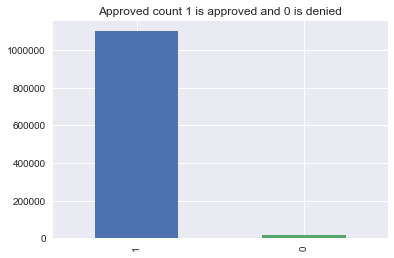

In [44]:
unpickled_h1_df.CASE_STATUS.value_counts().plot(kind="bar")
plt.title("Approved count 1 is approved and 0 is denied")

In [45]:
category_cols = ['FULL_TIME_POSITION', 'H1B_DEPENDENT','WILLFUL_VIOLATOR']

In [46]:
number_cols = ['PWAGE','EMPDAYS']

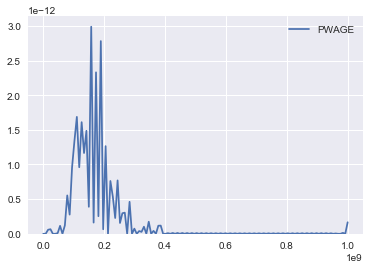

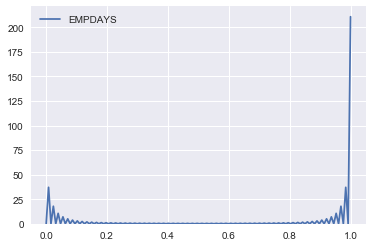

In [47]:
for col in number_cols:
    sns.kdeplot(unpickled_h1_df[col])
    plt.show()

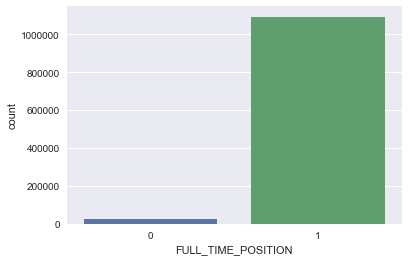

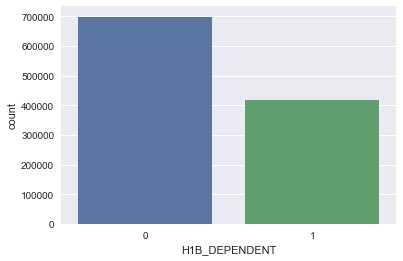

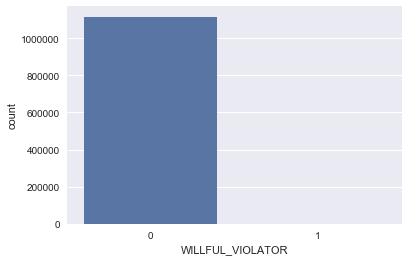

In [113]:
for col in category_cols:
    sns.countplot(col, data=unpickled_h1_df)
    plt.show()

In [ ]:
# sns.violinplot(x="CASE_STATUS", y="PWAGE", data=all_year_h1_df)

In [ ]:
# sns.violinplot(x="CASE_STATUS", y="EMPDAYS", data=all_year_h1_df)

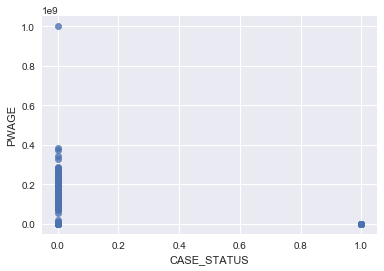

In [115]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
sns.regplot(x="CASE_STATUS", y="PWAGE", data=unpickled_h1_df, fit_reg=False, y_jitter=0.1)

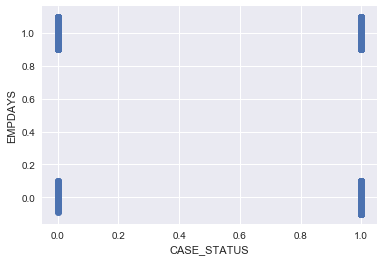

In [116]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
sns.regplot(x="CASE_STATUS", y="EMPDAYS", data=unpickled_h1_df, fit_reg=False, y_jitter=0.1)

In [117]:
def makeUniPlot(xinput):
    sns.regplot(x=xinput, y="CASE_STATUS", data=unpickled_h1_df, fit_reg=False, y_jitter=0.1, x_jitter=0.1, scatter_kws={"alpha": 0.2})
    plt.show()

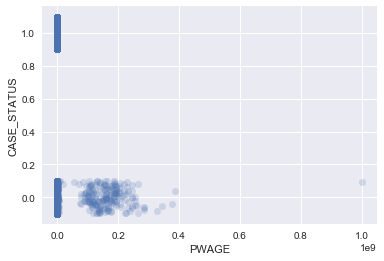

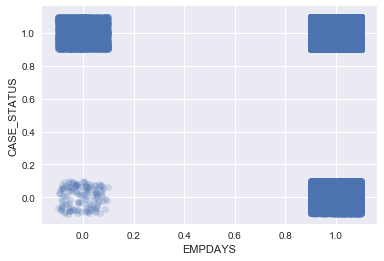

In [118]:
for col in number_cols:
    makeUniPlot(col)

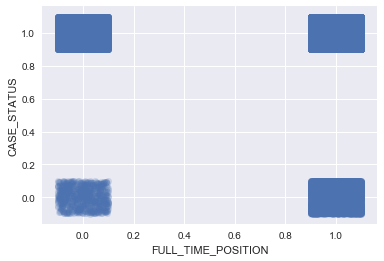

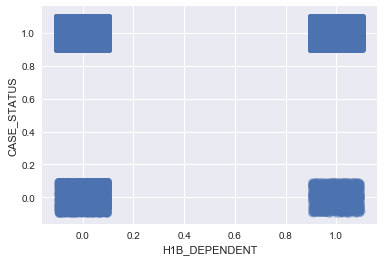

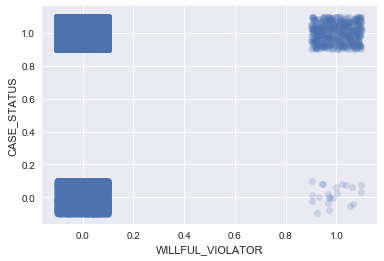

In [119]:
for col in category_cols:
    makeUniPlot(col)

In [120]:
plt.style.use("seaborn")

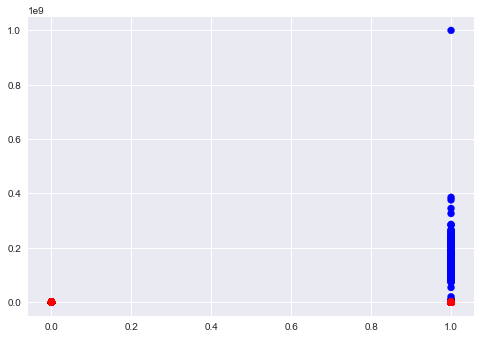

In [122]:
plt.scatter(x=unpickled_h1_df.EMPDAYS, y=unpickled_h1_df.PWAGE, c=unpickled_h1_df.CASE_STATUS, cmap="bwr")

# Training model

In [48]:
unpickled_h1_df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'FULL_TIME_POSITION', 'H1B_DEPENDENT',
       'JOB_TITLE', 'WILLFUL_VIOLATOR', 'PWAGE', 'EMPDAYS'],
      dtype='object')

In [49]:
features = ['FULL_TIME_POSITION', 'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'PWAGE', 'EMPDAYS']

# features = ['H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'PWAGE', 'EMPDAYS']

In [50]:
X = unpickled_h1_df[features]
y = unpickled_h1_df[['CASE_STATUS']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

In [55]:
X_train.shape, X_test.shape

((558348, 5), (558348, 5))

In [56]:
y_train.shape, y_test.shape

((558348, 1), (558348, 1))

In [57]:
X_train.head()

,FULL_TIME_POSITION,H1B_DEPENDENT,WILLFUL_VIOLATOR,PWAGE,EMPDAYS
2221965,1,0,0,90646.0,1
1401773,1,0,0,187200.0,1
2183840,1,1,0,90002.0,1
1766562,1,0,0,74090.0,1
1316179,1,0,0,74402.0,1


In [59]:
# normalize
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [60]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4
count,5.583480e+05,5.583480e+05,5.583480e+05,5.583480e+05,5.583480e+05
mean,2.173302e-15,1.542786e-15,-2.147534e-15,2.378930e-16,-1.689953e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-6.800997e+00,-7.734887e-01,-2.390931e-02,-4.220616e-02,-1.579533e+01
25%,1.470373e-01,-7.734887e-01,-2.390931e-02,-1.889568e-02,6.330983e-02
50%,1.470373e-01,-7.734887e-01,-2.390931e-02,-1.387811e-02,6.330983e-02
75%,1.470373e-01,1.292844e+00,-2.390931e-02,-7.405063e-03,6.330983e-02
max,1.470373e-01,1.292844e+00,4.182472e+01,3.682468e+02,6.330983e-02


In [61]:
pd.DataFrame(X_test).describe()

,0,1,2,3,4
count,558348.000000,558348.000000,558348.000000,558348.000000,558348.000000
mean,0.002277,-0.000585,-0.002024,-0.000630,0.002272
std,0.992393,0.999849,0.956769,0.874441,0.981962
min,-6.800997,-0.773489,-0.023909,-0.042206,-15.795335
25%,0.147037,-0.773489,-0.023909,-0.018888,0.063310
50%,0.147037,-0.773489,-0.023909,-0.013848,0.063310
75%,0.147037,1.292844,-0.023909,-0.007397,0.063310
max,0.147037,1.292844,41.824720,138.595760,0.063310


In [136]:
DTclf = DecisionTreeClassifier()
DTclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [137]:
DTclf.score(X_train, y_train)

0.9881758329930438

In [138]:
DTclf.score(X_test, y_test)

0.98447384068717

In [139]:
roc_auc_score(y_test, DTclf.predict(X_test))

0.5265430539838087

In [140]:
t0 = time.time()
rclf = RandomForestClassifier(n_estimators=10)
rclf.fit(X_train, y_train)
print(time.time() - t0)

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


37.383195877075195


In [141]:
rclf.score(X_test, y_test)

0.9851436738378215

In [142]:
roc_auc_score(y_test, rclf.predict(X_test))

0.5222478016373386

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# params = {
#     "max_depth": [2,4,6,8,10],
#     "min_samples_split": [5, 9, 19],
#     "min_samples_leaf": [2, 5, 10],
#     "max_leaf_nodes": [15, 20, 50],
# }

In [66]:
params = {
    "max_depth": [4,6,8,10],
    "min_samples_split": [5, 9, 19],
    "min_samples_leaf": [5, 10],
    "max_leaf_nodes": [25, 50],
}

In [67]:
grid = RandomizedSearchCV(DecisionTreeClassifier(), params, cv=4, n_jobs=1, n_iter=5)

In [68]:
grid

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=1,
          param_distributions={'max_depth': [4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [5, 10], 'max_leaf_nodes': [25, 50]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [69]:
grid.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=5, n_jobs=1,
          param_distributions={'max_depth': [4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [5, 10], 'max_leaf_nodes': [25, 50]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [70]:
grid.best_params_

{'max_depth': 10,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 9}

In [72]:
for i in range(3):
    clf_final = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=9)
    clf_final.fit(X_train, y_train)
    
    print(clf_final.score(X_test, y_test))
    print(roc_auc_score(y_test, clf_final.predict(X_test)))
    

0.9863812532685708
0.5113198337037367
0.9863812532685708
0.5113198337037367
0.9863812532685708
0.5113198337037367


In [73]:
np.mean(X_train, axis=0)

array([ 9.11167585e-17, -2.91166401e-17,  1.38456750e-17,  5.02032978e-18,
       -2.45775048e-16])

In [74]:
np.mean(X_test, axis=0)

array([ 0.00227724, -0.00058473, -0.00202367, -0.00063026,  0.00227222])

In [75]:
from sklearn import tree

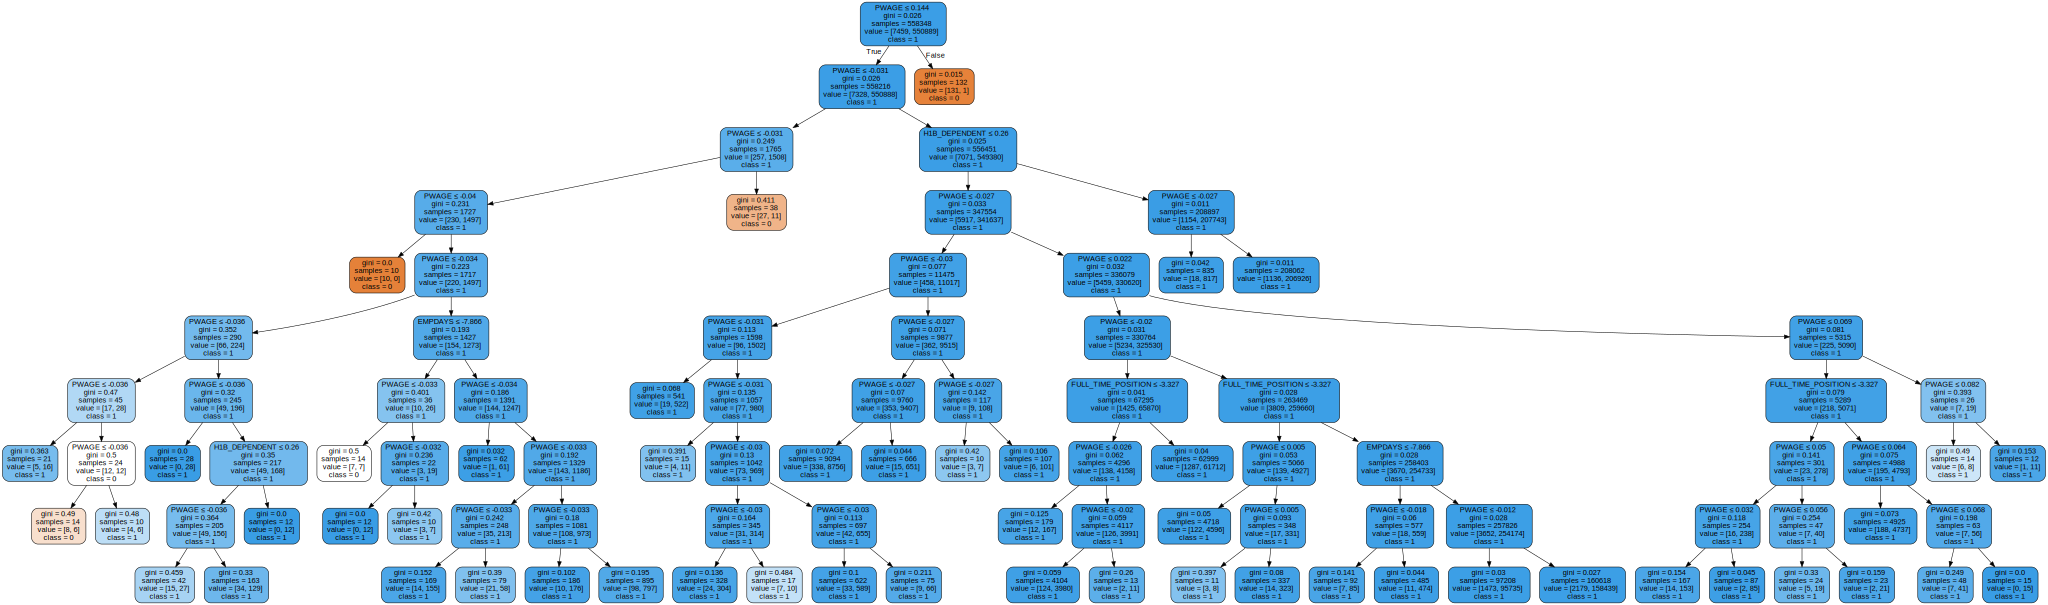

In [76]:
import graphviz 
dot_data = tree.export_graphviz(
    clf_final, out_file=None, 
    feature_names=features,  
    class_names=["0","1"],  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('h1btree.png')

graph = graphviz.Source(dot_data)  
graph 

In [77]:
for i in range(5):
    
    t0 = time.time()
    clf_DCfinal = DecisionTreeClassifier()
    
    clf_DCfinal.fit(X_train, y_train)
    t1 = time.time()
    
    ypred = clf_DCfinal.predict(X_test)
    scores = roc_auc_score(y_test, ypred)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X.columns 
    for cfi in zip(c, clf_DCfinal.feature_importances_):
        print(cfi)
    print()
    

Decision tree 1 took 2.9175310134887695 seconds to train and got a score of 0.5265475946170273

And here are the top features: 
('FULL_TIME_POSITION', 0.011158464329812906)
('H1B_DEPENDENT', 0.014165853274164326)
('WILLFUL_VIOLATOR', 0.0006096000026327851)
('PWAGE', 0.9672114672917393)
('EMPDAYS', 0.0068546151016506225)

Decision tree 2 took 2.6817069053649902 seconds to train and got a score of 0.5265448702370961

And here are the top features: 
('FULL_TIME_POSITION', 0.01167295835025903)
('H1B_DEPENDENT', 0.0141991293937244)
('WILLFUL_VIOLATOR', 0.0006096173612452851)
('PWAGE', 0.9666574653733291)
('EMPDAYS', 0.006860829521442204)

Decision tree 3 took 2.9686012268066406 seconds to train and got a score of 0.5266092700310168

And here are the top features: 
('FULL_TIME_POSITION', 0.011600431885389036)
('H1B_DEPENDENT', 0.014128314511189547)
('WILLFUL_VIOLATOR', 0.0006096000026327856)
('PWAGE', 0.9667109962084337)
('EMPDAYS', 0.006950657392354991)

Decision tree 4 took 3.0490057468414

In [78]:
job_df = pd.DataFrame(unpickled_h1_df.JOB_TITLE.unique())

In [79]:
job_df.to_csv("jobdata.csv")

In [80]:
def modelbench(classifier, X_train, Y_train):
    
    rs = ShuffleSplit(n_splits=3, test_size=.33)
    
    rs.get_n_splits(X_train)
    
    Y_train = Y_train.values
    Y_train = Y_train.ravel()

    for train_idx, test_idx in rs.split(X_train):
        ssX_train, ssX_test = X_train[train_idx], X_train[test_idx]
        ssy_train, ssy_test = Y_train[train_idx], Y_train[test_idx]

        t0 = time.time()
        
        ss_clf = classifier
        ss_clf.fit(X=ssX_train, y=ssy_train)

        ypred = ss_clf.predict(ssX_test)

        scores = roc_auc_score(ssy_test, ypred)
    
        t1 = time.time()
    
        print(f"{classifier} \n took {t1-t0} seconds to run and got a score of {scores}")
        print()

In [81]:
X_train

array([[ 0.14703727, -0.7734887 , -0.02390931, -0.00882224,  0.06330983],
       [ 0.14703727, -0.7734887 , -0.02390931,  0.02673753,  0.06330983],
       [ 0.14703727,  1.2928437 , -0.02390931, -0.00905942,  0.06330983],
       ...,
       [ 0.14703727, -0.7734887 , -0.02390931,  0.01914599,  0.06330983],
       [ 0.14703727, -0.7734887 , -0.02390931, -0.01313343,  0.06330983],
       [-6.80099658, -0.7734887 , -0.02390931,  0.01303718,  0.06330983]])

In [82]:
y_train

,CASE_STATUS
2221965,1
1401773,1
2183840,1
1766562,1
1316179,1
2047151,1
2188779,1
1648682,1
2158881,1
2341509,1


In [83]:
modelbench(DecisionTreeClassifier(), X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 2.4747581481933594 seconds to run and got a score of 0.529370162780534

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 
 took 2.4002699851989746 seconds to run and got a score of 0.5260712457156452

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            m

In [179]:
# pickle.dump(ss_clf, open('DTC_model', "ss_clf"))

In [84]:
unpickled_h1_df.head()

,CASE_STATUS,EMPLOYER_NAME,FULL_TIME_POSITION,H1B_DEPENDENT,JOB_TITLE,WILLFUL_VIOLATOR,PWAGE,EMPDAYS
1266850,1,CLOUDWICK TECHNOLOGIES INC.,1,1,HADOOP ADMINISTRATOR,0,102149.0,1
1266851,1,TATA CONSULTANCY SERVICES LIMITED,1,1,DEVELOPER USER INTERFACE,0,56784.0,1
1266852,1,"HEALTH MANAGEMENT SYSTEMS, INC.",1,0,SOLUTION ARCHITECT,0,85197.0,1
1266853,1,"BLACKROCK INVESTMENT MANAGEMENT, LLC",1,0,VICE PRESIDENT,0,117770.0,1
1266854,1,"UNIVERSITY OF CALIFORNIA, BERKELEY",1,0,ASSOCIATE SPECIALIST STEP II,0,66414.0,1


In [171]:
sm = SMOTE(random_state=2, sampling_strategy=.8)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

C:\Users\kochandr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [172]:
X_train_res

array([[ 0.14703727, -0.7734887 , -0.02390931, -0.00882224,  0.06330983],
       [ 0.14703727, -0.7734887 , -0.02390931,  0.02673753,  0.06330983],
       [ 0.14703727,  1.2928437 , -0.02390931, -0.00905942,  0.06330983],
       ...,
       [ 0.14703727, -0.7734887 , -0.02390931, -0.00666832,  0.06330983],
       [ 0.14703727,  1.2928437 , -0.02390931, -0.00989058,  0.06330983],
       [ 0.14703727, -0.7734887 , -0.02390931, -0.02918386,  0.06330983]])

In [173]:
y_train_res.shape

(991600,)

In [174]:
sum(y_train_res) / y_train_res.shape[0]

0.5555556676079064

In [181]:
from imblearn.under_sampling import RandomUnderSampler

In [182]:
RandomUnderSampler

imblearn.under_sampling._prototype_selection._random_under_sampler.RandomUnderSampler

In [183]:
rus = RandomUnderSampler(random_state=2)
X_train_res2, y_train_res2 = rus.fit_sample(X_train, y_train)

In [184]:
sum(y_train_res2) / y_train_res2.shape[0]

array([0.5])

In [185]:
X_train_res2.shape

(14918, 5)

In [186]:
clf = DecisionTreeClassifier()
resampled_DTclf = GridSearchCV(clf, params, cv=5, verbose=5, n_jobs=1)
resampled_DTclf.fit(X_train_res2, y_train_res2.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.6025469168900804, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.600201072386059, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.6022117962466488, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.5995308310991957, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_spl

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19, score=0.6156941649899397, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5, score=0.6025469168900804, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5, score=0.599195710455764, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5, score=0.6012064343163539, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5 
[CV]  max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5, score=0.5998659517426274, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=25, min_samples_leaf=10, min_samples_split=5 
[CV]  

[CV]  max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=9, score=0.596514745308311, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=9 
[CV]  max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=9, score=0.6146881287726358, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19 
[CV]  max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19, score=0.6005361930294906, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19 
[CV]  max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19, score=0.599195710455764, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19 
[CV]  max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19, score=0.603887399463807, total=   0.0s
[CV] max_depth=6, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=19 
[CV]  max_d

[CV]  max_depth=6, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=19, score=0.613682092555332, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.5988605898123325, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.5971849865951743, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.6028820375335121, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5, score=0.6052278820375335, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=25, min_samples_leaf=5, min_samples_split=5 
[CV]  max_dept

[CV]  max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, score=0.6048927613941019, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5 
[CV]  max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, score=0.6005361930294906, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5 
[CV]  max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, score=0.5985254691689008, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5 
[CV]  max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, score=0.6103286384976526, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=9 
[CV]  max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=9, score=0.5975201072386059, total=   0.0s
[CV] max_depth=8, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=9 
[CV] 

[CV]  max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, score=0.5988605898123325, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5 
[CV]  max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=5, score=0.608316566063045, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=9 
[CV]  max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=9, score=0.5995308310991957, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=9 
[CV]  max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=9, score=0.6062332439678284, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=9 
[CV]  max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=9, score=0.603887399463807, total=   0.0s
[CV] max_depth=10, max_leaf_nodes=50, min_samples_leaf=5, min_samples_split=9 
[CV]  m

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'max_depth': [4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [5, 10], 'max_leaf_nodes': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [187]:
f1_score(y_test, resampled_DTclf.predict(X_test))

0.6590758831685739

In [188]:
roc_auc_score(y_test, resampled_DTclf.predict(X_test))

0.6114521274035825

In [160]:
clf = DecisionTreeClassifier()
resampled_DTclf = GridSearchCV(clf, params, cv=5, verbose=5, n_jobs=3)
resampled_DTclf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   18.9s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   52.0s
[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed:  1.9min
[Parallel(n_jobs=3)]: Done 240 out of 240 | elapsed:  3.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'max_depth': [4, 6, 8, 10], 'min_samples_split': [5, 9, 19], 'min_samples_leaf': [5, 10], 'max_leaf_nodes': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [161]:
resampled_DTclf.score(X_train_res, y_train_res)

0.8415407841274547

In [162]:
resampled_DTclf.score(X_test, y_test)

0.9806249865675171

In [163]:
roc_auc_score(y_test, resampled_DTclf.predict(X_test))

0.5314485898923882

In [164]:
from sklearn.metrics import f1_score

In [165]:
f1_score(y_test, resampled_DTclf.predict(X_test))

0.9902081824764664

In [124]:
from sklearn.naive_bayes import GaussianNB

In [175]:
clf = GaussianNB()

In [176]:
clf.fit(X_train_res, y_train_res.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [177]:
clf.predict_proba(X_train_res)

array([[4.97353015e-04, 9.99502647e-01],
       [4.11928612e-01, 5.88071388e-01],
       [6.39717422e-05, 9.99936028e-01],
       ...,
       [5.44610642e-04, 9.99455389e-01],
       [6.26345122e-05, 9.99937365e-01],
       [1.93641093e-03, 9.98063589e-01]])

In [178]:
pd.DataFrame(clf.predict_proba(X_train_res)).describe()

,0,1
count,991600.000000,991600.000000
mean,0.060672,0.939328
std,0.232351,0.232351
min,0.000061,0.000000
25%,0.000114,0.999091
50%,0.000534,0.999466
75%,0.000909,0.999886
max,1.000000,0.999939


In [179]:
pd.DataFrame(y_train_res).describe()

,0
count,991600.000000
mean,0.555556
std,0.496904
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [109]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]        
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 49.33833892739346%


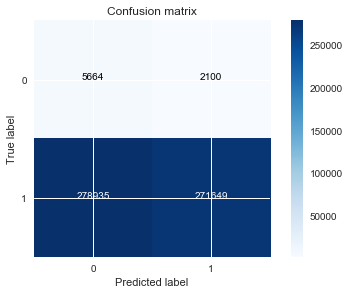

In [189]:
y_test_pre = resampled_DTclf.predict(X_test)

cnf_matrix_tra = confusion_matrix(y_test, y_test_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the train dataset: 88.58048908068524%


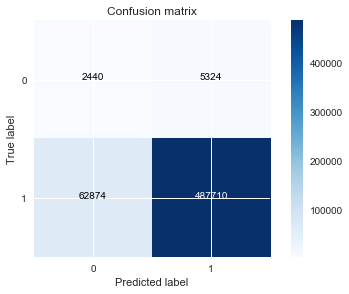

Decision tree 1 took 8.126894474029541 seconds to train and got a score of 0.6000379425698352

And here are the top features: 
('FULL_TIME_POSITION', 0.006399021862071971)
('H1B_DEPENDENT', 0.0895130110247137)
('WILLFUL_VIOLATOR', 0.0005690925473439045)
('PWAGE', 0.8991645497579928)
('EMPDAYS', 0.004354324807877766)

Recall metric in the train dataset: 88.5790360780553%


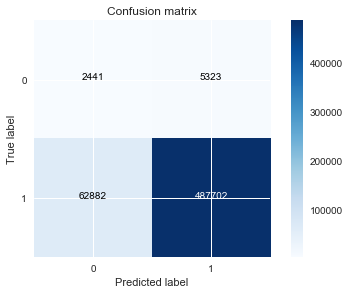

Decision tree 2 took 9.380515098571777 seconds to train and got a score of 0.6000950773506062

And here are the top features: 
('FULL_TIME_POSITION', 0.006421175163836006)
('H1B_DEPENDENT', 0.08953141121569752)
('WILLFUL_VIOLATOR', 0.0005466732091651121)
('PWAGE', 0.8991518154462572)
('EMPDAYS', 0.004348924965044137)

Recall metric in the train dataset: 88.58012583002775%


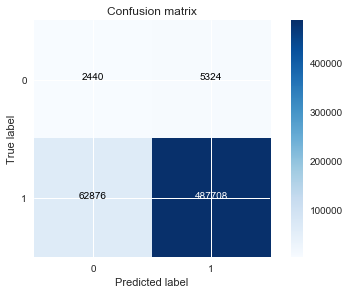

Decision tree 3 took 9.260589599609375 seconds to train and got a score of 0.6000361263165479

And here are the top features: 
('FULL_TIME_POSITION', 0.006415155767960522)
('H1B_DEPENDENT', 0.08950127899305362)
('WILLFUL_VIOLATOR', 0.0005731398232904581)
('PWAGE', 0.8991415255533318)
('EMPDAYS', 0.004368899862363596)

Recall metric in the train dataset: 88.57958095404153%


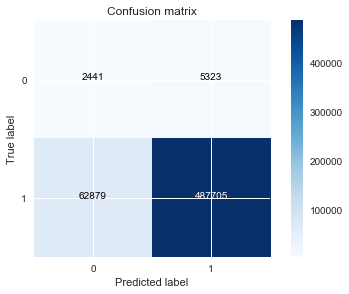

Decision tree 4 took 9.084744215011597 seconds to train and got a score of 0.6000978017305374

And here are the top features: 
('FULL_TIME_POSITION', 0.006422198797938671)
('H1B_DEPENDENT', 0.08951853022909764)
('WILLFUL_VIOLATOR', 0.0005594855737868998)
('PWAGE', 0.8991501823581524)
('EMPDAYS', 0.004349603041024349)

Recall metric in the train dataset: 88.58085233134273%


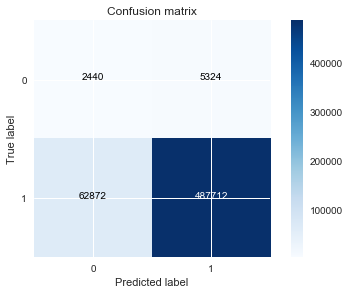

Decision tree 5 took 8.338727951049805 seconds to train and got a score of 0.6000397588231227

And here are the top features: 
('FULL_TIME_POSITION', 0.00641538122357456)
('H1B_DEPENDENT', 0.08951967899195472)
('WILLFUL_VIOLATOR', 0.0005593759230712824)
('PWAGE', 0.8991447982448598)
('EMPDAYS', 0.004360765616539549)



In [111]:
for i in range(5):
    
    t0 = time.time()
    clf_DCfinal = DecisionTreeClassifier()
    
    clf_DCfinal.fit(X_train_res, y_train_res)
    t1 = time.time()
    
    ypred = clf_DCfinal.predict(X_test)
    scores = roc_auc_score(y_test, ypred)
    
    cnf_matrix_tra = confusion_matrix(y_test, ypred)

    print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
    plt.show()
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X.columns 
    for cfi in zip(c, clf_DCfinal.feature_importances_):
        print(cfi)
    print()
    

In [119]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
skf.get_n_splits(X_train, y_train)

print(skf)

for train_index, test_index in skf.split(X_train, y_train):
    print(a)
    skfX_train, skfX_test = X_train[train_index], X_test[test_index]
    skfy_train, skfy_test = y_train[train_index], y_test[test_index]

    

# StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
# for train_index, test_index in skf.split(X_train, y_train):  

#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]


StratifiedKFold(n_splits=2, random_state=42, shuffle=True)
(array([     0,      2,      6, ..., 558342, 558346, 558347]), array([     1,      3,      4, ..., 558343, 558344, 558345]))
(array([     0,      2,      6, ..., 558342, 558346, 558347]), array([     1,      3,      4, ..., 558343, 558344, 558345]))
